In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,f1_score
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('../data/Clean_apps_ar_reviews.csv', encoding='utf-8')

In [33]:
# splitting the data into target and feature
feature = train["Review"]

# encode Label Column
encoder = LabelEncoder()
train['Label'] = encoder.fit_transform(train['Polarity sentiment'])

target = train['Label']
# splitting into train and tests
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size =.2, random_state=100)

## Random Forest

In [34]:
# assemble several steps that can be cross-validated together while setting different parameters.
pipe = make_pipeline(TfidfVectorizer(),
                    RandomForestClassifier())
# used to iterate over parameter value combinations 
param_grid = {'randomforestclassifier__n_estimators':[10, 100, 1000],
             'randomforestclassifier__max_features':['sqrt', 'log2']}

# exhaustive search over specified parameter values for an estimator.
rf_model = GridSearchCV(pipe, param_grid, cv=5)
rf_model.fit(X_train,Y_train)

prediction = rf_model.predict(X_test)

print("f1 Score -> ",f1_score(Y_test,prediction,average='micro')*100)

f1 Score ->  78.67287543655414
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1330
           1       0.32      0.18      0.23       536
           2       0.89      0.93      0.91      2429

    accuracy                           0.79      4295
   macro avg       0.64      0.63      0.63      4295
weighted avg       0.76      0.79      0.77      4295



In [35]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",rf_model.best_estimator_)
print("\n The best score across ALL searched params:\n",rf_model.best_score_)
print("\n The best parameters across ALL searched params:\n",rf_model.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features='log2'))])

 The best score across ALL searched params:
 0.8006867604421377

 The best parameters across ALL searched params:
 {'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__n_estimators': 100}


## Multinomial Naive Bayes

In [41]:
# assemble several steps that can be cross-validated together while setting different parameters.
pipe = make_pipeline(TfidfVectorizer(),
                    MultinomialNB())
pipe.fit(X_train,Y_train)
prediction = pipe.predict(X_test)
print("f1 Score -> ",f1_score(Y_test,prediction,average='micro')*100)


f1 Score ->  77.9743888242142


## SVM

In [42]:
# assemble several steps that can be cross-validated together while setting different parameters.
pipe = make_pipeline(TfidfVectorizer(), SVC())

# used to iterate over parameter value combinations 
param_grid = {'svc__kernel': ['rbf', 'poly'],
             'svc__gamma': [0.1, 1, 10, 100],
             'svc__C': [0.1, 1, 10, 100]}

# exhaustive search over specified parameter values for an estimator.
svc_model = GridSearchCV(pipe, param_grid, cv=3)
svc_model.fit(X_train, Y_train)

prediction = svc_model.predict(X_test)
print("f1 Score -> ",f1_score(Y_test,prediction,average='micro')*100)


f1 Score ->  81.86263096623982


In [43]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",svc_model.best_estimator_)
print("\n The best score across ALL searched params:\n",svc_model.best_score_)
print("\n The best parameters across ALL searched params:\n",svc_model.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('svc', SVC(C=10, gamma=0.1))])

 The best score across ALL searched params:
 0.8282791652468937

 The best parameters across ALL searched params:
 {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


## Confusion Matrix of The Best Model

[[1039  134  157]
 [ 215  237   84]
 [ 150   39 2240]]


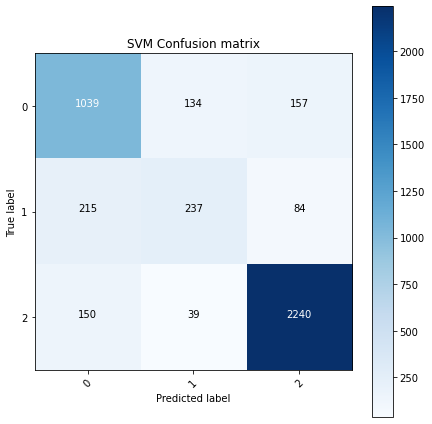

In [46]:
from sklearn.metrics import confusion_matrix
import itertools    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    print(cm)
    thresh = cm.max() / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,prediction)
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=[0,1,2],
                      title='SVM Confusion matrix')

plt.show()

### Save The Model

In [ ]:
filename = 'secendSVM_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

# Reload Model
with open(filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

### Make Predictions

In [ ]:
# Use the Reloaded Model to predict target values
Ypredict = Pickled_LR_Model.predict(Test_X)  

Ypredict

In [ ]:
#Load new unlabeled data and label it using the model
sample_sub=pd.read_csv('finalUnlabelled.csv', encoding='utf-8')
text = vectorizer.transform(sample_sub['text'])

y_pre=Pickled_LR_Model.predict(text)
sub=pd.DataFrame({'text':sample_sub['text'].values.tolist(),'target':y_pre})
sub.to_csv('new_labeled_data.csv',index=False)